# Conjoint Analysis to understand Customer Preference

In [1]:
# Load Packages

from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum

In [2]:
# Load data

conjoint_dat = pd.read_csv('conjoint_data-crisps.csv', delimiter = '\t')
conjoint_dat.head()

,flavor,price,weight,fat_free,sodium_free,gluten_free,organic,multipack,ranking
0,cheese&onion,$1.00,100g,fat_free NO,low_sodium NO,gluten_free NO,organic NO,multipack NO,11
1,salt&vinegar,$3.00,100g,fat_free NO,low_sodium YES,gluten_free YES,organic YES,multipack NO,12
2,chicken_flavored,$4.00,200g,fat_free NO,low_sodium NO,gluten_free NO,organic YES,multipack NO,9
3,salt&vinegar,$4.00,400g,fat_free YES,low_sodium YES,gluten_free NO,organic NO,multipack NO,2
4,salt&vinegar,$2.00,300g,fat_free NO,low_sodium NO,gluten_free NO,organic YES,multipack YES,8


In [5]:
# set up sum contrasts for main effects coding as needed for conjoint analysis
# using C(effect,Sum) notation within main effects model specification
main_effects_model = 'ranking ~ C(flavor, Sum) + C(price, Sum)+ C(weight, Sum)+ C(fat_free, Sum)+ C(sodium_free, Sum)+ \
        C(gluten_free, Sum)+ C(organic, Sum)+ C(multipack, Sum)'
main_effects_model_fit = smf.ols(main_effects_model, data = conjoint_dat).fit()
print(main_effects_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Thu, 07 Jan 2021   Prob (F-statistic):             0.0794
Time:                        12:25:02   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

C:\Users\Sonia\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [27]:
conjoint_attributes = ['flavor', 'price', 'weight', 'fat_free', 'sodium_free', 'gluten_free','organic', 'multipack']

# Build  Part worth information one attribute at a time

level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(conjoint_dat[item])))
    level_name.append(list(np.unique(conjoint_dat[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(main_effects_model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration

In [28]:
# Values in each of the attributes
level_name

[['cheese&onion', 'chicken_flavored', 'salt&vinegar', 'tomato_ketchup'],
 ['$1.00', '$2.00', '$3.00', '$4.00'],
 ['100g', '200g', '300g', '400g'],
 ['fat_free NO', 'fat_free YES'],
 ['low_sodium NO', 'low_sodium YES'],
 ['gluten_free NO', 'gluten_free YES'],
 ['organic NO', 'organic YES'],
 ['multipack NO', 'multipack YES']]

In [ ]:
[['cheese&onion', 'chicken_flavored', 'salt&vinegar', 'tomato_ketchup'],
 ['$1.00', '$2.00', '$3.00', '$4.00'],
 ['100g', '200g', '300g', '400g'],
 ['fat_free NO', 'fat_free YES'],
 ['low_sodium NO', 'low_sodium YES'],
 ['gluten_free NO', 'gluten_free YES'],
 ['organic NO', 'organic YES'],
 ['multipack NO', 'multipack YES']]

In [8]:
# Compute attribute relative importance values from ranges

attribute_importance = []
for item in part_worth_range:
    attribute_importance.append(round(100*(item/sum(part_worth_range)),2))

In [9]:
# report conjoint measures to console

labels_pw = []
data_pw = []
part_worth_dict = {}

index = 0  # initialize for use in for-loop
for item in conjoint_attributes:
    print('\nAttribute:', item)
    print(' Importance:', attribute_importance[index])
    print(' Level Part-Worths')
    for level in range(len(level_name[index])):
        print('       ',level_name[index][level], part_worth[index][level])
        labels_pw.append(item+'_'+str(attribute_importance[index])+'__'+level_name[index][level]+
                         '_'+str(round(part_worth[index][level],3)))
        data_pw.append(part_worth[index][level])
        part_worth_dict[level_name[index][level]] = part_worth[index][level]
    index = index + 1


Attribute: flavor
 Importance: 2.38
 Level Part-Worths
        cheese&onion 2.864375403532904e-14
        chicken_flavored -2.020605904817785e-14
        salt&vinegar 0.24999999999999512
        tomato_ketchup -0.25000000000000355

Attribute: price
 Importance: 7.14
 Level Part-Worths
        $1.00 0.7500000000000147
        $2.00 -1.5987211554602254e-14
        $3.00 2.6645352591003757e-15
        $4.00 -0.7500000000000013

Attribute: weight
 Importance: 51.19
 Level Part-Worths
        100g 4.999999999999979
        200g 2.0000000000000373
        300g -1.2500000000000138
        400g -5.750000000000002

Attribute: fat_free
 Importance: 16.67
 Level Part-Worths
        fat_free NO -1.7499999999999996
        fat_free YES 1.7499999999999996

Attribute: sodium_free
 Importance: 2.38
 Level Part-Worths
        low_sodium NO 0.25000000000000144
        low_sodium YES -0.25000000000000144

Attribute: gluten_free
 Importance: 2.38
 Level Part-Worths
        gluten_free NO 0.25000000000000

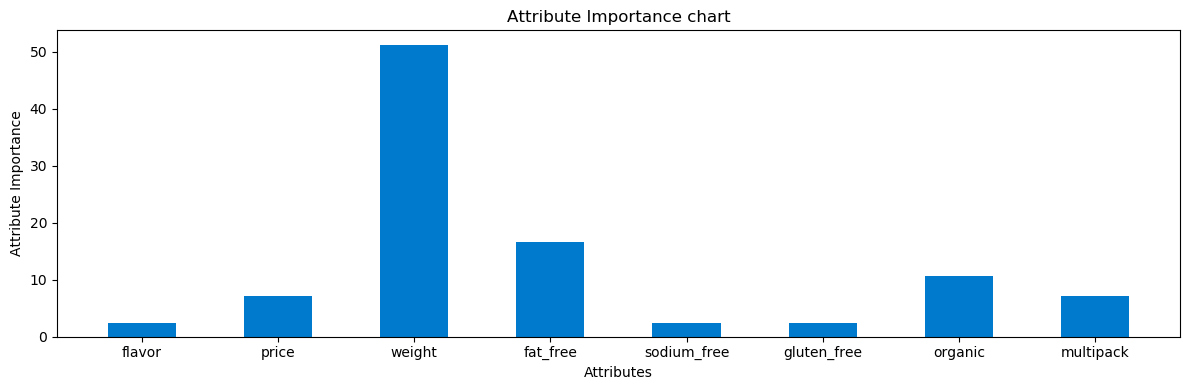

In [10]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (12,4))

# Example data
ax.bar(conjoint_attributes, attribute_importance,width = 0.5, align='center',color='#007acc')
ax.set_xlabel('Attributes')
ax.set_ylabel('Attribute Importance')
ax.set_title('Attribute Importance chart')
plt.tight_layout()

plt.show()

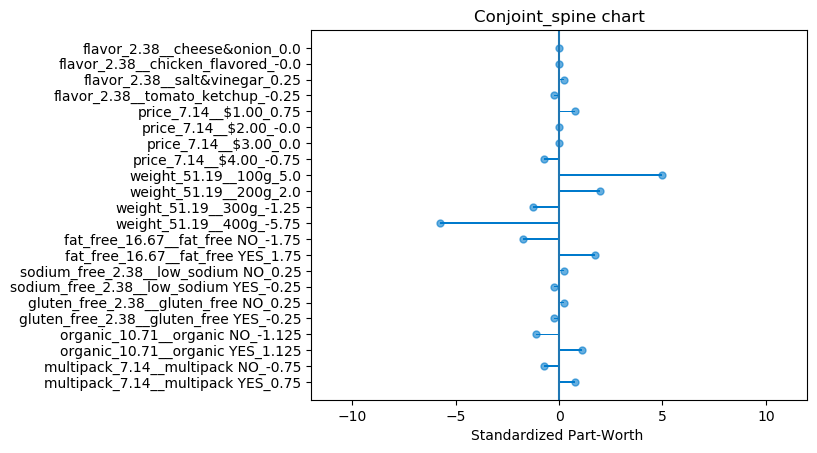

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(labels_pw))
ax.barh(y_pos, data_pw, height =0.1, align='center',color='#007acc')
plt.plot(data_pw, labels_pw, "o", markersize=5, color='#007acc', alpha=0.6)
#plt.hlines(y=labels, xmin=0, xmax=data, color='#007acc', alpha=0.2, linewidth=5)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels_pw)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Standardized Part-Worth ')
ax.set_title('Conjoint_spine chart')
ax.set_xlim(-12,12)
ax.axvline(0,)

plt.show()

In [77]:
conjoint_dat.columns[:-2]

Index(['flavor', 'price', 'weight', 'fat_free', 'sodium_free', 'gluten_free',
       'organic', 'multipack'],
      dtype='object')

In [15]:
# utility calculation

utility = []

for i in range(conjoint_dat.shape[0]):
    score = part_worth_dict[conjoint_dat['flavor'][i]]+ part_worth_dict[conjoint_dat['price'][i]]+\
    part_worth_dict[conjoint_dat['weight'][i]]+part_worth_dict[conjoint_dat['fat_free'][i]]+\
    part_worth_dict[conjoint_dat['sodium_free'][i]]+part_worth_dict[conjoint_dat['gluten_free'][i]]+\
    part_worth_dict[conjoint_dat['organic'][i]]+part_worth_dict[conjoint_dat['multipack'][i]]
    utility.append(score)
    
conjoint_dat['utility'] = utility

Text(0.5, 1.0, 'Utility score for the given combinations')

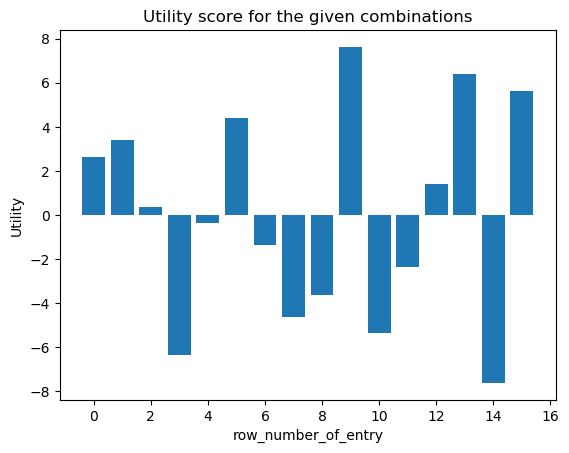

In [18]:
plt.bar(range(len(utility)),utility)
plt.xlabel('row_number_of_entry')
plt.ylabel('Utility')
plt.title('Utility score for the given combinations')

In [52]:
# Max utility 
print("The profile that has the highest utility score :",'\n', conjoint_dat.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 flavor          tomato_ketchup
price                    $4.00
weight                    100g
fat_free          fat_free YES
sodium_free      low_sodium NO
gluten_free    gluten_free YES
organic            organic YES
multipack        multipack YES
ranking                     16
utility                  7.625
Name: 9, dtype: object


In [67]:
# Optimal utility combination - This is the combination of max values from partworth levels
utility_optimal_solution = 0
i = 0
for key in important_levels.keys():
    print("The preferred", key, "is", level_name[i][important_levels[key]])
    utility_optimal_solution += part_worth_dict[level_name[i][important_levels[key]]]
    i+=1

print('-------------------------------------------')
print("Utility_Score_of_the_optimal_combination is ", round(utility_optimal_solution,4))

print("The current highest utility score in the given combination", round(max(utility),4))
print("The new combination brings in additional",round(utility_optimal_solution-max(utility),3),"units of utility.")

The preferred flavor is salt&vinegar
The preferred price is $1.00
The preferred weight is 100g
The preferred fat_free is fat_free YES
The preferred sodium_free is low_sodium NO
The preferred gluten_free is gluten_free NO
The preferred organic is organic YES
The preferred multipack is multipack YES
-------------------------------------------
Utility_Score_of_the_optimal_combination is  10.125
The current highest utility score in the given combination 7.625
The new combination brings in additional 2.5 units of utility.


In [48]:
# Predicted Market Share through logit model

total_utility=0
c= 0.8
for item in utility:
    total_utility = total_utility + np.exp(c*item)

market_shares =[]
row_number = 0
for item in utility:
    probability = np.exp(c*item)/total_utility
    market_shares.append(probability)
    print ('Market share of profile %s is %s ' % (row_number,probability*100))
    row_number +=1

Market share of profile 0 is 1.0720457114483275 
Market share of profile 1 is 1.9533946457079363 
Market share of profile 2 is 0.17720796422512702 
Market share of profile 3 is 0.0008003741140983789 
Market share of profile 4 is 0.0972537927752796 
Market share of profile 5 is 4.3473597335213015 
Market share of profile 6 is 0.043698945964187455 
Market share of profile 7 is 0.0032456770809551334 
Market share of profile 8 is 0.00722338718433561 
Market share of profile 9 is 58.531712596042084 
Market share of profile 10 is 0.0017812653490318375 
Market share of profile 11 is 0.01963520212310353 
Market share of profile 12 is 0.39438357723784223 
Market share of profile 13 is 21.532613720638878 
Market share of profile 14 is 0.00029444118182260195 
Market share of profile 15 is 11.817348965405685 


Text(0.5, 1.0, 'Predicted Market Share for the profiles')

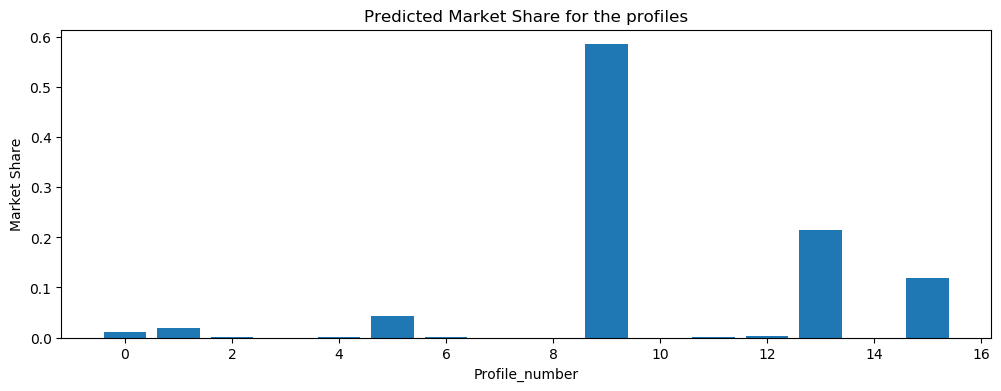

In [73]:
plt.figure(figsize = (12,4))
plt.bar(range(len(market_shares)),market_shares)
plt.xlabel('Profile_number')
plt.ylabel('Market Share')
plt.title('Predicted Market Share for the profiles')